### From here on, we'll only be considering **Natural Earthquakes**. 

In [63]:
import numpy as np
import pandas as pd

In [64]:
data = pd.read_csv("earthquake database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [65]:
# Correcting incorrect dates
data.at[3378, "Date"] = "02/23/1975"
data.at[7512, "Date"] = "04/28/1985"
data.at[20650, "Date"] = "03/13/2011"

# Converting the datatype of 'Date' from numpy object to datetime64[ns]
data['Date'] = pd.to_datetime(data['Date'])

In [66]:
# Correcting incorrect times
data.at[3378, "Time"] = "02:58:41"
data.at[7512, "Time"] = "02:53:41"
data.at[20650, "Time"] = "02:23:34"
# Converting the datatype of 'Time' from numpy object to timedelta64[ns]
data['Time'] = pd.to_timedelta(data['Time'])

# Merging 'Date' and 'Time' into a new 'Date_Time' column
data["Date_Time"] = data["Date"] + data["Time"]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

In [67]:
#As we did before, we filter out the data points for natural earthquakes
only_quakes = data.set_index("Type")
only_quakes = only_quakes.drop(["Nuclear Explosion","Explosion","Rock Burst"],axis=0)

In [68]:
#let's check this out real quick:
only_quakes.head()

,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Date_Time
Type,,,,,,,,,,,,,,,,,,,,,
Earthquake,1965-01-02,0 days 13:44:18,19.246,145.616,131.6,NaN,NaN,6.0,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
Earthquake,1965-01-04,0 days 11:29:49,1.863,127.352,80.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
Earthquake,1965-01-05,0 days 18:05:58,-20.579,-173.972,20.0,NaN,NaN,6.2,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
Earthquake,1965-01-08,0 days 18:49:43,-59.076,-23.557,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
Earthquake,1965-01-09,0 days 13:32:50,11.938,126.427,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


### We'll first explore **time forecasting and regression based models**
Here, we'll consider the continuous nature of the magnitude data. This will allow us to build regression models that try to predict the actual magnitude of the earthquake based on the aforementioned factors

#### Before we begin our models, let's understand how exactly we'll be evaluating them to find the best fit:
##### We'll be creating a dataframe that stores the results of each of the models we run.
##### Upon doing a comparative analysis at the end, we will have found the most effective model to predict earthquake magnitude on the basis of geographical coordinates and depth.

In [69]:
import time
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
all_model = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Time'])
all_model
#it's important to remember here that we're not working with classification, we're working with prediction

,Model,MSE,MAE,Time


In [71]:
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return mse, mae

In [72]:
X = only_quakes[['Latitude', 'Longitude', 'Depth']].values
y = only_quakes['Magnitude'].values

#### **ARIMA**

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [75]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
def fit_arima(X_train, X_test, y_train, y_test):
    #fit model
    model = ARIMA(y_train, exog=X_train, order=(5, 1, 0))
    model_fit = model.fit()

    #Make predictions
    start_time = time.time()  #start the stopwatch
    predictions = model_fit.forecast(steps=len(y_test), exog=X_test)
    total_time = time.time() - start_time  # end it

    return predictions, total_time

In [77]:
predictions, total_time = fit_arima(X_train, X_test, y_train, y_test)
mse, mae = evaluate_model(predictions, y_test)

In [78]:
all_model.loc[len(all_model)] = ['ARIMA', mse, mae, total_time]
all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357


#### **Gradient boosting regression**

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
def fit_gbr(X_train, X_test, y_train, y_test):
    # Fit GBR model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    start_time = time.time()  # Start the stopwatch
    predictions = model.predict(X_test)
    total_time = time.time() - start_time  # End it
    return predictions, total_time

In [83]:
predictions, total_time = fit_gbr(X_train, X_test, y_train, y_test)
mse, mae = evaluate_model(predictions, y_test)

In [84]:
  all_model.loc[len(all_model)] = ['GBR', mse, mae, total_time]
  all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357
1,GBR,0.174817,0.307142,0.009216


#### **Support vector regression**

In [85]:
from sklearn.svm import SVR

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
def fit_svr(X_train, X_test, y_train, y_test):
    # Fit SVR model
    model = SVR()
    model.fit(X_train, y_train)

    # Make predictions
    start_time = time.time()
    predictions = model.predict(X_test)
    total_time = time.time() - start_time

    return predictions, total_time

In [89]:
predictions, total_time = fit_svr(X_train, X_test, y_train, y_test)
mse, mae = evaluate_model(predictions, y_test)

In [90]:
all_model.loc[len(all_model)] = ['SVR' , mse, mae, total_time]
all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357
1,GBR,0.174817,0.307142,0.009216
2,SVR,0.192384,0.293057,3.945576


#### **Random forest regressor**

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
def fit_rfr(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    start_time = time.time()
    predictions = model.predict(X_test)
    total_time = time.time() - start_time

    return predictions, total_time

In [95]:
predictions, total_time = fit_rfr(X_train, X_test, y_train, y_test)
mse, mae = evaluate_model(predictions, y_test)

In [96]:
all_model.loc[len(all_model)] = ['RFR' , mse, mae, total_time]
all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357
1,GBR,0.174817,0.307142,0.009216
2,SVR,0.192384,0.293057,3.945576
3,RFR,0.195527,0.322118,0.238586


#### **Custom Neural network**

In [98]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

##### Building the model

In [99]:
def create_model(neurons=16, activation='relu', optimizer='adam', loss='mean_squared_error'):
    #create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(1))  #no activation function for regression
    #Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['mean_squared_error'])
    return model

In [100]:
seed = 7
tf.random.set_seed(seed)

In [101]:
model = KerasClassifier(model=create_model, verbose=0)

##### Hyperparameter tuning

1. **Best Epoch and Batch Size**

In [102]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

### User warnings below to be ignored as per the official documentation

In [103]:
best_model = None
best_mse = np.inf
best_batch_size = None  #Initialize best batch size variable

for batch_size in batch_size:
    for epoch in epochs:
        #create and compile model
        model = create_model()

        #Fit model
        model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, verbose=0)

        #evaluate model
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        #check if current model is the best
        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_batch_size = batch_size  #Update best batch size
            best_epoch = epoch  #Update best epoch
        #else womp womp move on to the next

print("Best Batch Size:", best_batch_size)
print("Best Epoch:", best_model.get_config()['layers'][1]['config']['units'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Batch Size: 10
Best Epoch: 16


2. **Best Number of Neurons, Activation functions, Optimizers, and Loss**

In [104]:
best_model = None
best_mse = np.inf
best_params = {}

for neurons in [16]:
    for activation in ['sigmoid', 'relu']:
        for optimizer in ['adam', 'rmsprop']:
            for loss in ['mean_squared_error']:
                #Create and compile the model with current parameters
                model = create_model(neurons=neurons, activation=activation, optimizer=optimizer, loss=loss)

                #Fit the model
                model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epoch, verbose=0)

                #Evaluate the model
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)

                #Check if current model is the best
                if mse < best_mse:
                    best_mse = mse
                    best_model = model
                    best_params = {"neurons": neurons, "activation": activation, "optimizer": optimizer, "loss": loss}

print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Parameters: {'neurons': 16, 'activation': 'sigmoid', 'optimizer': 'adam', 'loss': 'mean_squared_error'}


##### Final implementation of model

### User warnings below to be ignored as per the official documentation

In [105]:
model = Sequential()
model.add(Dense(neurons, input_shape=(3,), activation='sigmoid'))
model.add(Dense(1))  #no activation function for regression
#Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=40, epochs=16, verbose=0)
total_time = time.time() - start_time

In [107]:
predictions = model.predict(X_test)
mse, mae = evaluate_model(predictions, y_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [108]:
all_model.loc[len(all_model)] = ['NN' , mse, mae, total_time]
all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357
1,GBR,0.174817,0.307142,0.009216
2,SVR,0.192384,0.293057,3.945576
3,RFR,0.195527,0.322118,0.238586
4,NN,0.181970,0.311683,11.410697


In [109]:
#making sure we did it right:
unique_values = only_quakes.index.unique()
print(unique_values)
#so we have only natural earthquakes!!

Index(['Earthquake'], dtype='object', name='Type')


### Final Results for Regression Models

In [110]:
all_model

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.517357
1,GBR,0.174817,0.307142,0.009216
2,SVR,0.192384,0.293057,3.945576
3,RFR,0.195527,0.322118,0.238586
4,NN,0.181970,0.311683,11.410697


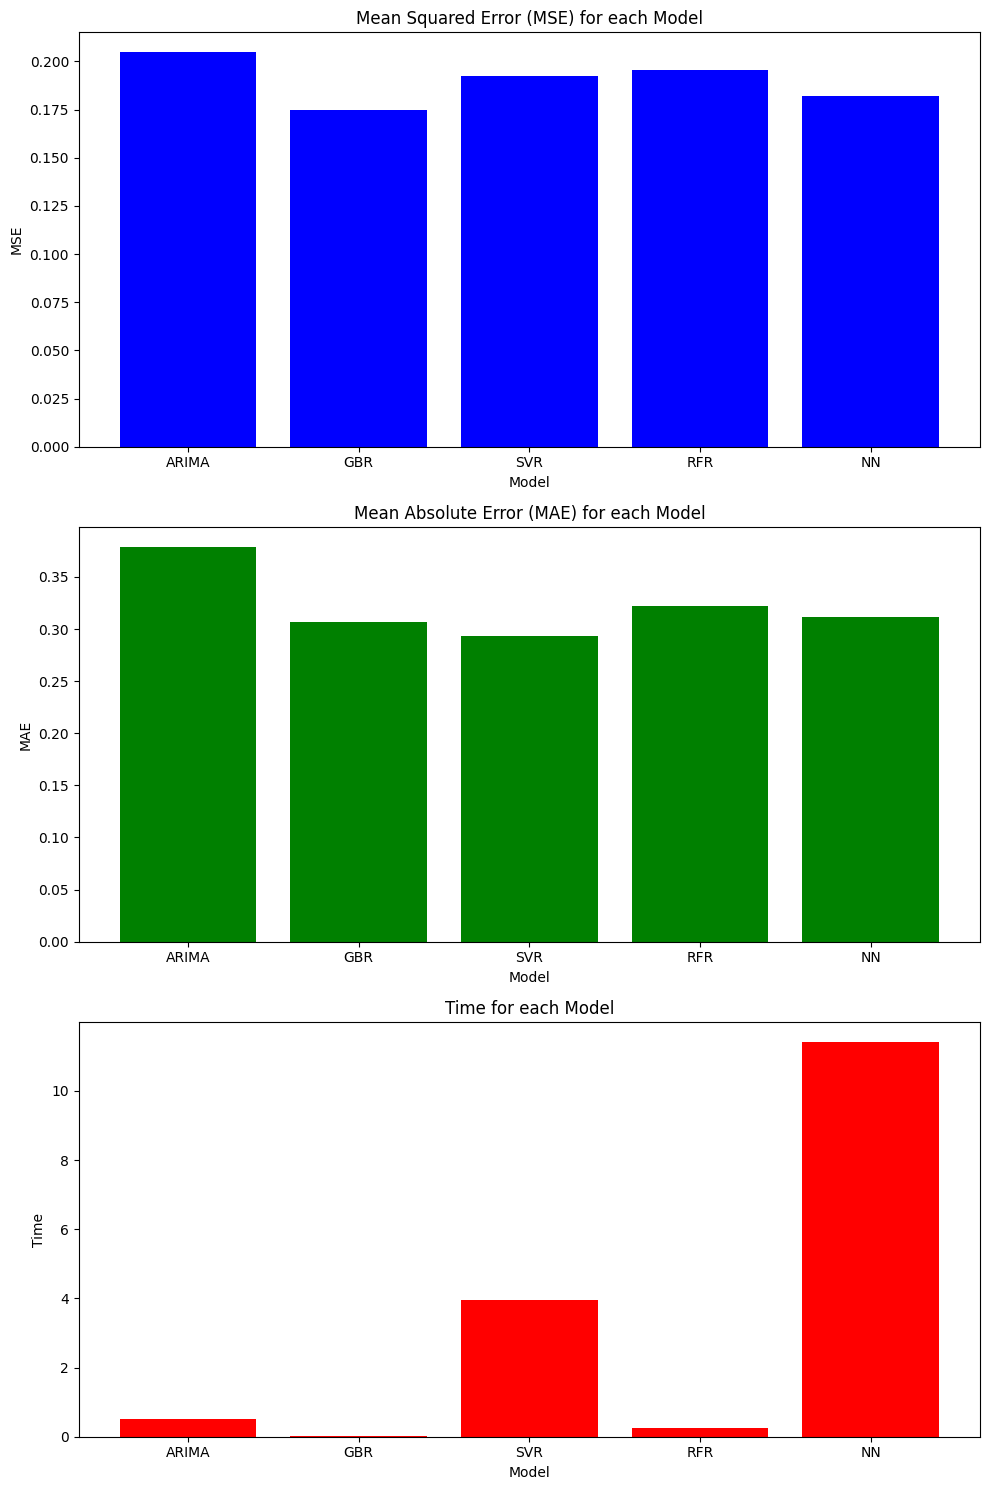

In [111]:
import matplotlib.pyplot as plt

models = all_model['Model']
mse = all_model['MSE']
mae = all_model['MAE']
time = all_model['Time']

# Create subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Plot MSE
axs[0].bar(models, mse, color='blue')
axs[0].set_title('Mean Squared Error (MSE) for each Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('MSE')

# Plot MAE
axs[1].bar(models, mae, color='green')
axs[1].set_title('Mean Absolute Error (MAE) for each Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MAE')

# Plot Time
axs[2].bar(models, time, color='red')
axs[2].set_title('Time for each Model')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('Time')

# Display the plots
plt.tight_layout()
plt.show()


## Hence, GBR is the best performing model with the least MSE, second lowest MAE and the lowest computational time.